[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.1500 - val_loss: 0.0235
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0216 - val_loss: 0.0073
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - val_loss: 0.0065
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.

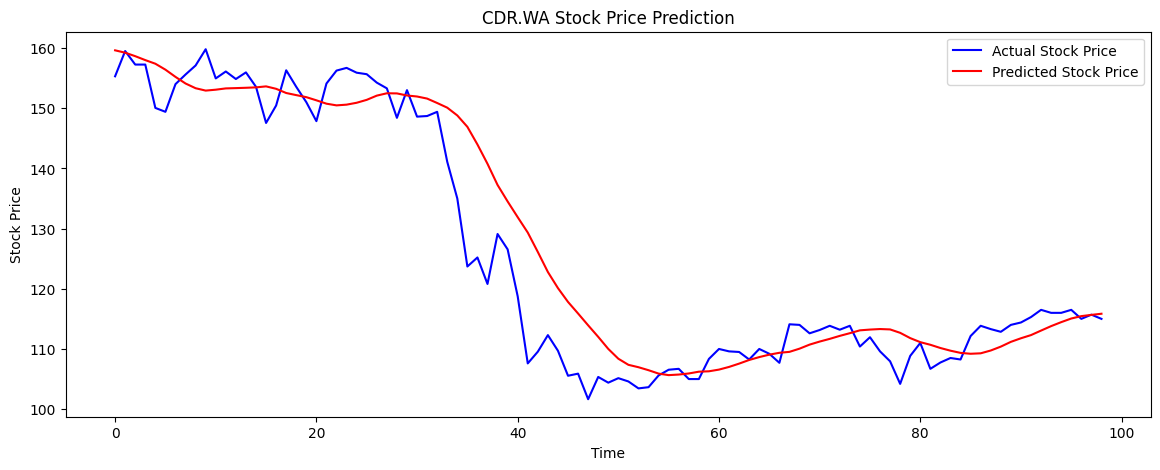

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#downloading the stock data for CDProject
ticker = 'CDR.WA'
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')

#close price for prediction
data = data[['Close']]

#scaling the data, as models perform better between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

#creating sequences of 10 days
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#LSTM based model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#training the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

#predictions
predictions = model.predict(X_test)

#inversing the values from 0-1 range to their original values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

#results plot
plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:

#average price of y_test
average_price = np.mean(y_test)

#RMSE as a percentage of the average price
percentage_rmse = (rmse / average_price) * 100

#RMSE and percentage RMSE
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Percentage RMSE: {percentage_rmse}%')


Root Mean Squared Error (RMSE): 6.460763594507556
Percentage RMSE: 5.129831418315064%
